### Imports and Libraries

In [245]:
import pandas as pd
import os
import sys
import ast

# Add the src directory to the system path
sys.path.append(os.path.abspath('../src'))

from utils import *

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load CMU dataset into different dataframes

In [246]:
file_path = "../MovieSummaries"

print("Dataframes creation starting for CMU datasets...")

df_plot_summaries = pd.read_csv(file_path + "/plot_summaries.txt", delimiter="\t", header=None, names=["ID", "Summary"]) # renaming the columns for better understanding
df_movie_metadata = pd.read_csv(file_path + "/movie.metadata.tsv", delimiter="\t", header=None) 
df_character_metadata = pd.read_csv(file_path + "/character.metadata.tsv", delimiter="\t", header=None) 
df_tvtropes_clusters = pd.read_csv(file_path + "/tvtropes.clusters.txt", delimiter="\t", header=None) 
df_name_clusters = pd.read_csv(file_path + "/name.clusters.txt", delimiter="\t", header=None) 

print("Dataframes creation for CMU datasets done.")

Dataframes creation starting for CMU datasets...
Dataframes creation for CMU datasets done.


In [247]:
df_plot_summaries.head()

,ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [248]:
# Fix names of the columns
df_movie_metadata.columns = ['wiki_movie_ID', 'freebase_movie_ID', 'title', 'release_date', 'box_office', 'runtime', 'languages', 'countries', 'genres']
df_character_metadata.columns = ['wiki_movie_ID', 'freebase_movie_ID', 'release_date', 'char', 'birth_date', 'gender', 'height', 'ethnicity', 'actor', 'age_at_release','freebase_map_ID', 'freebase_char_ID', 'freebase_actor_ID']
df_tvtropes_clusters.columns = ['cluster','dictionary']

## Format the dataframes to use them easily

In [249]:
df_movie_metadata['languages'] = df_movie_metadata['languages'].apply(clean_column)
df_movie_metadata['countries'] = df_movie_metadata['countries'].apply(clean_column)
df_movie_metadata['genres'] = df_movie_metadata['genres'].apply(clean_column)

In [250]:
df_plot_summaries.head()

,ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [251]:
df_movie_metadata.head()

,wiki_movie_ID,freebase_movie_ID,title,release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction, Drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama


In [252]:
df_character_metadata.head()

,wiki_movie_ID,freebase_movie_ID,release_date,char,birth_date,gender,height,ethnicity,actor,age_at_release,freebase_map_ID,freebase_char_ID,freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [253]:
df_tvtropes_clusters.head()

,cluster,dictionary
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [254]:
df_name_clusters.head()

,0,1
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


### Initial Exploration through visualization

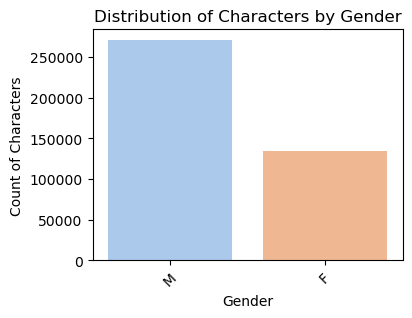

In [255]:
# Count of Characters by Gender
gender_counts = df_character_metadata['gender'].value_counts()

# Visualization of Gender Distribution
plt.figure(figsize=(4, 3))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel', hue=gender_counts.index, legend=False)
plt.title('Distribution of Characters by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Characters')
plt.xticks(rotation=45)
plt.show()

In [256]:
# Percentage Representation of Female Characters
total_characters = gender_counts.sum()
female_count = gender_counts.get('F', 0)
male_count = gender_counts.get('M', 0)

female_percentage = (female_count / total_characters) * 100
male_percentage = (male_count / total_characters) * 100

print(f"Female characters: {female_percentage:.2f}%")
print(f"Male characters: {male_percentage:.2f}%")

Female characters: 33.28%
Male characters: 66.72%


### Try to visualize women VS men action in different genres

In [257]:
def string_to_list(df, column):
    """ Turn the column specified of the df from a string to a list """
    df[column] = df[column].str.split(', ')
    return df

In [258]:
df_movie_metadata = string_to_list(df_movie_metadata, 'genres')

<Figure size 1200x800 with 0 Axes>

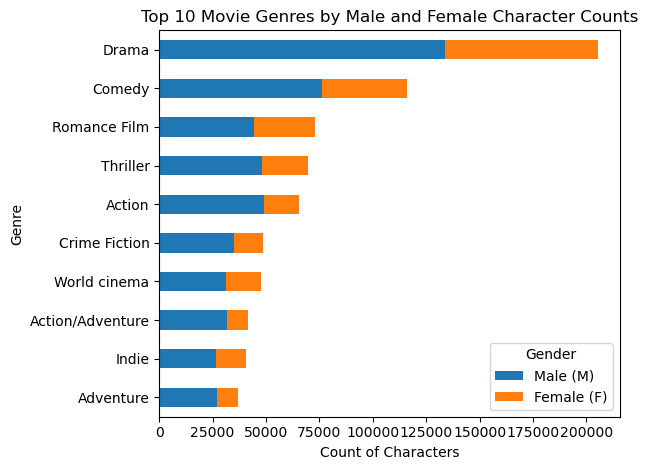

In [271]:
merged_df = df_movie_metadata.explode('genres').merge(
    df_character_metadata,
    on='wiki_movie_ID',
    how='inner'
)

# Count characters by genre and gender
gender_genre_counts = merged_df.groupby(['genres', 'gender']).size().unstack(fill_value=0)

gender_genre_counts['Total'] = gender_genre_counts.sum(axis=1)
top_genres = gender_genre_counts.sort_values(by='Total', ascending=False).head(10)  # Get top 10 genres

top_genres = top_genres[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_genres[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])  # Males and Females colors
plt.title('Top 10 Movie Genres by Male and Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

In [260]:
gender_genre_counts.head()

gender,F,M,Total
genres,,,
,1442,2559,4001
Absurdism,342,895,1237
Acid western,12,78,90
Action,16203,49184,65387
Action Comedy,399,1224,1623


### Find most frequent characterizations for females and males based on tvtropesw clusters

In [261]:
df_tvtropes_clusters = string_to_dict(df_tvtropes_clusters, 'dictionary')

In [262]:
df_tvtropes_clusters.head()

,cluster,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [263]:
merged_df1 = pd.merge(df_tvtropes_clusters, df_character_metadata, how = "left", left_on = "id", right_on="freebase_map_ID")
merged_df1.head()

,cluster,char_x,movie,id,actor_x,wiki_movie_ID,freebase_movie_ID,release_date,char_y,birth_date,gender,height,ethnicity,actor_y,age_at_release,freebase_map_ID,freebase_char_ID,freebase_actor_ID
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams,1344253,/m/04vcfx,1997-11-26,Professor Philip Brainard,1951-07-21,M,1.702,NaN,Robin Williams,46.0,/m/0jy9q0,/m/0cls20k,/m/0dzf_
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane,1486573,/m/0557n3,1994-12-21,Professor Keenbean,1955-06-25,M,NaN,NaN,Michael McShane,39.0,/m/02vchl3,/m/0h6dygh,/m/05tkfc
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen,5991505,/m/0fjjjh,1994-07-01,Dr. Reinhardt Lane,1939-05-25,M,1.800,NaN,Ian McKellen,55.0,/m/0k6fkc,/m/0gynqd6,/m/03ym1
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn,605676,/m/02vt5c,1954-06-16,Dr. Harold Medford,1877-09-26,M,NaN,NaN,Edmund Gwenn,NaN,/m/0k6_br,/m/0h5whpq,/m/03bpcj
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader,28327,/m/070g7,1994-10-28,Daniel Jackson,1960-02-07,M,1.780,NaN,James Spader,34.0,/m/0k3rhh,/m/02qs1z,/m/043js


<Figure size 1200x800 with 0 Axes>

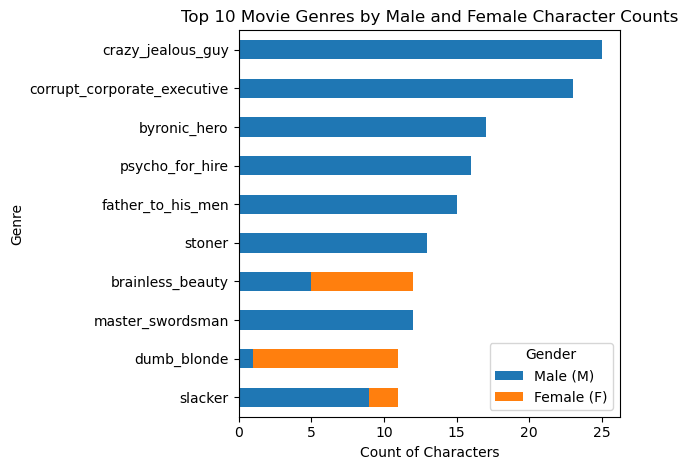

In [ ]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

gender_cluster_counts['Total'] = gender_cluster_counts.sum(axis=1)
top_clusters = gender_cluster_counts.sort_values(by='Total', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top clusters
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 cluster characterizations by Male and Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

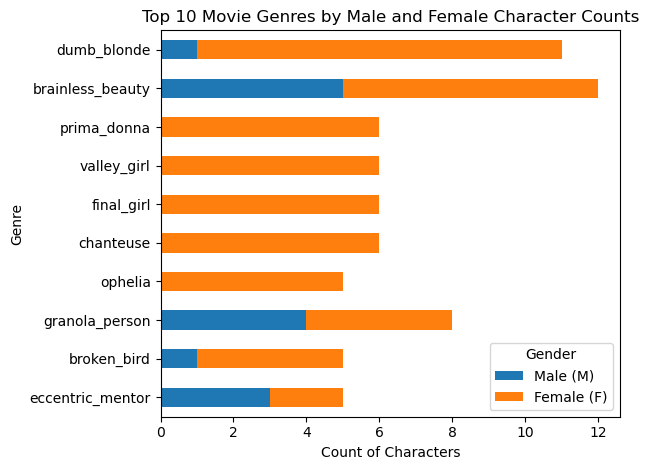

In [281]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

top_clusters = gender_cluster_counts.sort_values(by='F', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Movie Genres by Male and Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

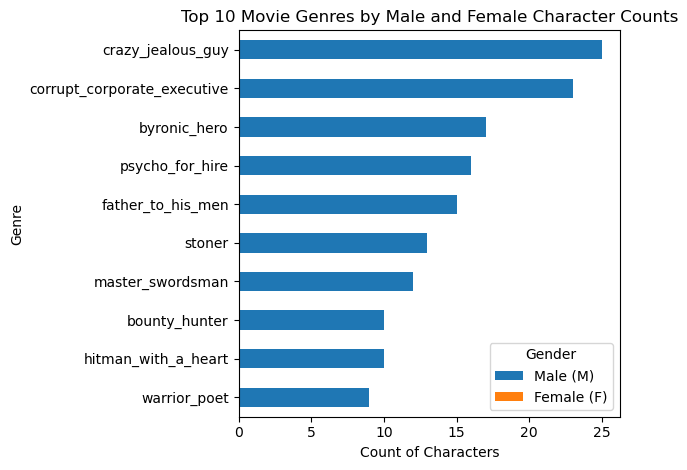

In [283]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

top_clusters = gender_cluster_counts.sort_values(by='M', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Movie Genres by Male and Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()